## 1. Setup and Imports

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_breast_cancer, load_wine

# Add parent directory to path to import automl
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))

from automl.pipeline import run_pipeline

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Imports successful!")

✅ Imports successful!


## 2. Load Dataset

We'll use the classic Iris dataset for demonstration.

In [2]:
# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print(f"Dataset shape: {df.shape}")
print(f"\nFeatures: {list(df.columns[:-1])}")
print(f"Target classes: {iris.target_names}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (150, 5)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']

First few rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Dataset statistics
print("📊 Dataset Statistics:")
print(df.describe())

print("\n📋 Data Types:")
print(df.dtypes)

print("\n🎯 Target Distribution:")
print(df['target'].value_counts())

📊 Dataset Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

📋 Data Types:
sepal length (cm)    float64
sepal 

## 3. Visualize Data

<Figure size 1400x1000 with 0 Axes>

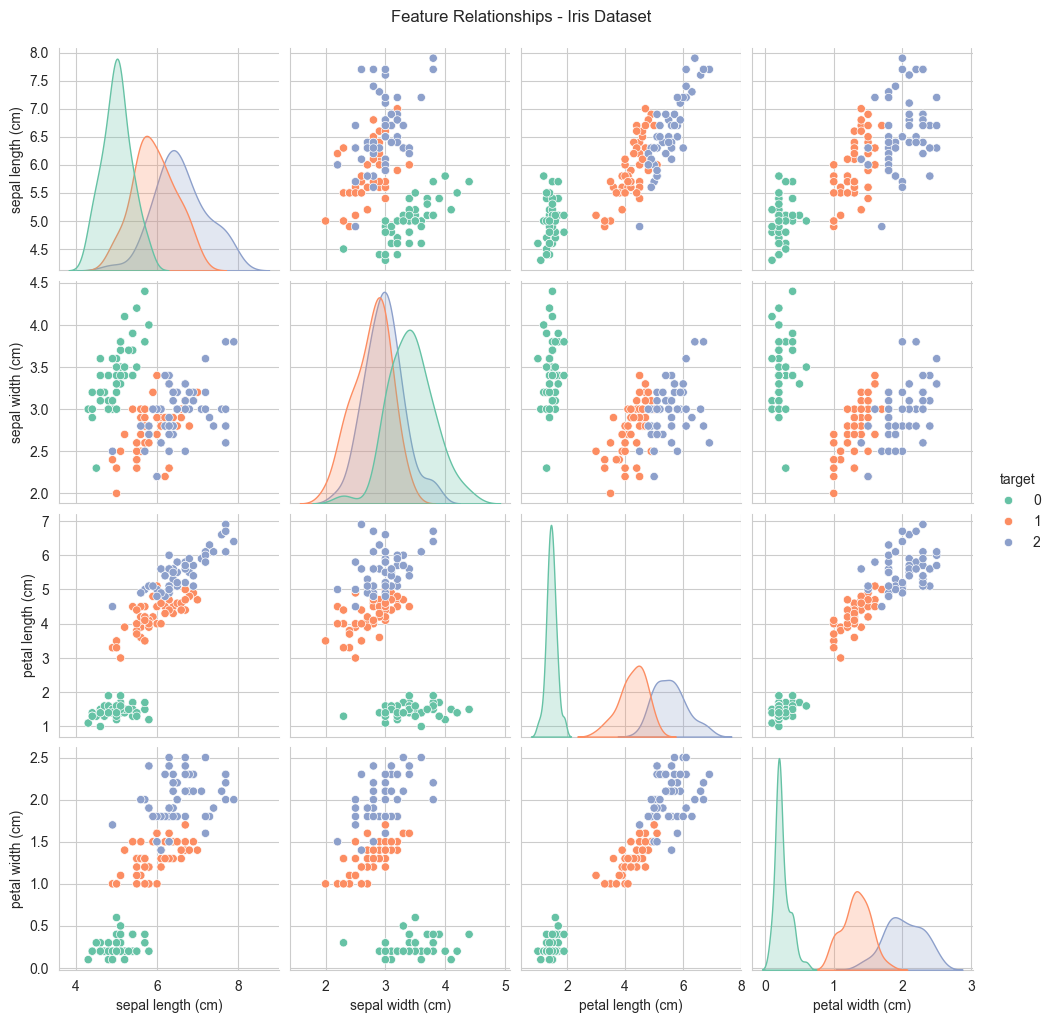

In [4]:
# Pairplot to visualize feature relationships
plt.figure(figsize=(14, 10))
sns.pairplot(df, hue='target', palette='Set2')
plt.suptitle('Feature Relationships - Iris Dataset', y=1.02)
plt.show()

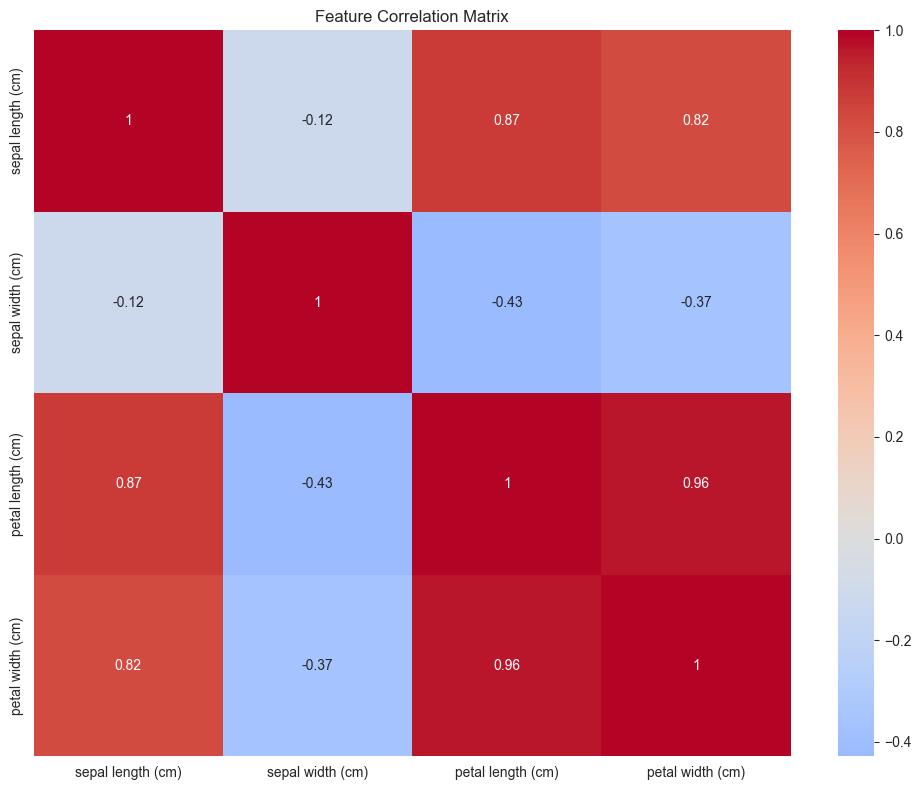

In [5]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.iloc[:, :-1].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

## 4. Run AutoML Pipeline

The pipeline will:
1. Detect data type (tabular)
2. Preprocess features (scaling, encoding)
3. Select best features
4. Train multiple models
5. Tune hyperparameters
6. Evaluate and compare

In [7]:
# Run pipeline with feature selection and hyperparameter tuning
results = run_pipeline(
    dataset=df,
    target_column='target',
    task_type='classification',
    feature_selection_enabled=True,
    hyperparameter_tuning_enabled=True,
    # Removed invalid preprocessing override
    hyperparameter_params={'search_method': 'grid'}
)

print("\n" + "="*70)
print("✅ Pipeline completed successfully!")
print("="*70)

2025-12-19 03:31:47,987 - automl.preprocessing - INFO - ======================================================================
2025-12-19 03:31:47,988 - automl.preprocessing - INFO - 🚀 AUTOML PREPROCESSING DISPATCHER
2025-12-19 03:31:47,990 - automl.preprocessing - INFO - ======================================================================
2025-12-19 03:31:47,993 - automl.preprocessing - INFO - 📌 Data type: tabular
2025-12-19 03:31:47,995 - automl.preprocessing - INFO - 📊 Routing to: tabular_preprocessing.preprocess_tabular()
2025-12-19 03:31:47,996 - automl.preprocessing - INFO - ======================================================================
2025-12-19 03:31:47,998 - automl.tabular_preprocessing - INFO - ============================================================
2025-12-19 03:31:47,999 - automl.tabular_preprocessing - INFO - Starting tabular data preprocessing...
2025-12-19 03:31:48,001 - automl.tabular_preprocessing - INFO - ===============================================

==== AutoML Pipeline: Start ====
Detected data type: tabular
Preprocessing data...
Running feature selection...
Initial features: 4
Selected features: 2
Applying selected indices to train/val/test splits...
Training baseline models...
Training tabular model: LogisticRegression
Training tabular model: DecisionTreeClassifier
Training tabular model: RandomForestClassifier
Training tabular model: SVC
Training tabular model: KNeighborsClassifier
Training tabular model: GradientBoostingClassifier
Evaluating models...
Evaluating model: logistic_regression
Evaluating model: decision_tree
Evaluating model: random_forest
Evaluating model: svc
Evaluating model: knn
Evaluating model: gradient_boosting
Selecting best model...
Model logistic_regression: F1-weighted=0.9333, Accuracy=0.9333, Precision=0.9333
Model decision_tree: F1-weighted=0.9333, Accuracy=0.9333, Precision=0.9333
Model random_forest: F1-weighted=0.9666, Accuracy=0.9667, Precision=0.9697
Model svc: F1-weighted=0.9333, Accuracy=0.9333

## 5. Analyze Results

In [8]:
# Best model
best_model_info = results.get('best_model')
best_model_name = None
best_model_obj = None

# Extract name/object from various possible shapes
if isinstance(best_model_info, dict):
    best_model_name = (
        best_model_info.get('name')
        or best_model_info.get('Model')
        or best_model_info.get('model_name')
    )
    best_model_obj = (
        best_model_info.get('model')
        or best_model_info.get('estimator')
        or best_model_info.get('object')
        or best_model_info.get('model_obj')
    )
else:
    # If best_model is directly the estimator object
    best_model_obj = best_model_info

# Fallback: infer best model name from evaluation results
evaluation_results = results.get('evaluation_results', {})
if not best_model_name and isinstance(evaluation_results, dict) and evaluation_results:
    import numpy as np
    def score_key(item):
        name, data = item
        metrics = data.get('metrics', {})
        # Higher accuracy preferred for classification
        acc = metrics.get('accuracy')
        return -(acc if acc is not None else -np.inf)
    try:
        best_model_name = sorted(evaluation_results.items(), key=score_key)[0][0]
    except Exception:
        best_model_name = next(iter(evaluation_results))

# Try retrieving the trained estimator from results if missing
if best_model_obj is None and best_model_name:
    trained = results.get('trained_models', {})
    if isinstance(trained, dict):
        best_model_obj = trained.get(best_model_name)

print(f"🏆 Best Model: {best_model_name or 'Unknown'}")
print("\nModel Details:")
if best_model_obj is not None:
    print(best_model_obj)
else:
    print("Model object not available in results. Proceeding with metrics only.")

🏆 Best Model: random_forest

Model Details:
RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)


In [16]:
# Selected features
if results.get('selected_features'):
    print(f"✅ Selected Features ({len(results['selected_features'])}/{len(df.columns)-1}):")
    for i, feature in enumerate(results['selected_features'], 1):
        print(f"  {i}. {feature}")
else:
    print("ℹ️ Feature selection was not performed or all features were kept.")

ℹ️ Feature selection was not performed or all features were kept.


In [10]:
# All trained models and their metrics
print("📈 Model Performance Comparison:\n")
evaluation_results = results['evaluation_results']

model_scores = []
for model_name, eval_data in evaluation_results.items():
    metrics = eval_data.get('metrics', {})
    model_scores.append({
        'Model': model_name,
        'Accuracy': metrics.get('accuracy', 0),
        'Precision': metrics.get('precision', 0),
        'Recall': metrics.get('recall', 0),
        'F1-Score': metrics.get('f1_score', 0)
    })

scores_df = pd.DataFrame(model_scores)
scores_df = scores_df.sort_values('Accuracy', ascending=False)
print(scores_df.to_string(index=False))

📈 Model Performance Comparison:

              Model  Accuracy  Precision  Recall  F1-Score
                knn  0.966667          0       0         0
      random_forest  0.966667          0       0         0
  gradient_boosting  0.966667          0       0         0
logistic_regression  0.933333          0       0         0
      decision_tree  0.933333          0       0         0
                svc  0.933333          0       0         0


## 6. Visualize Model Performance

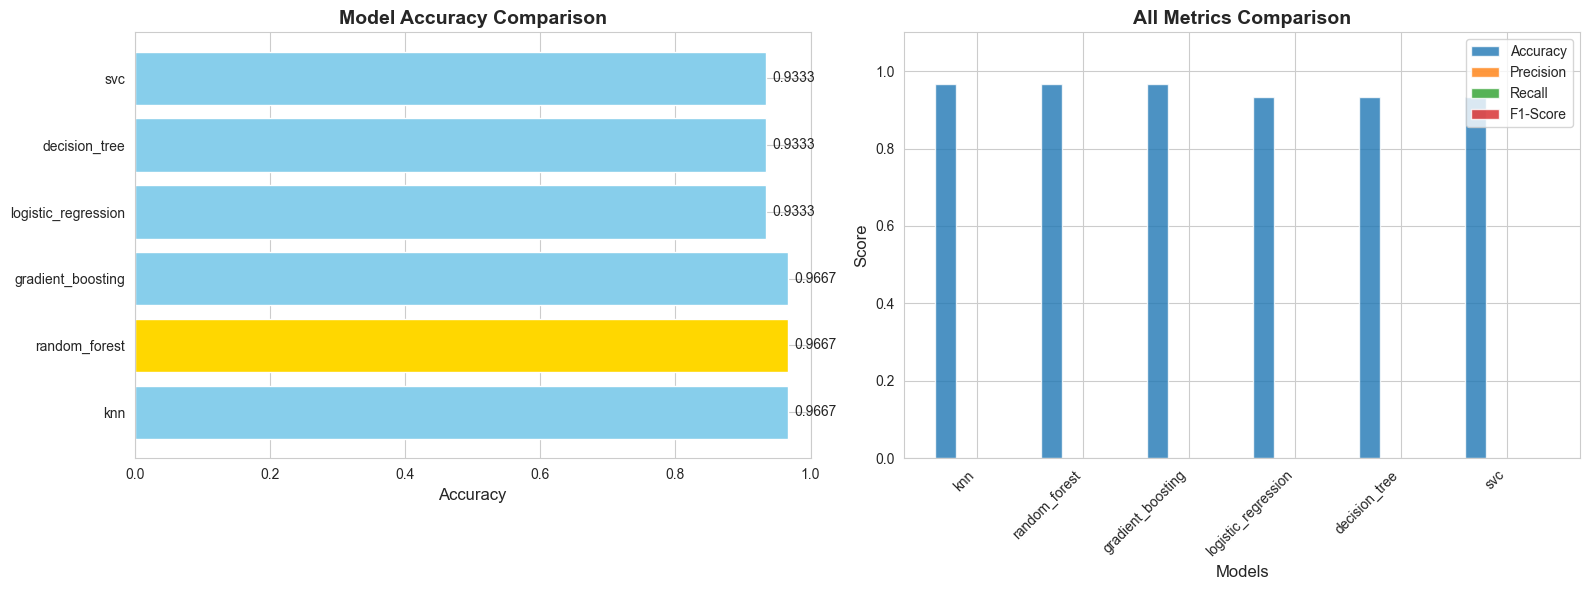

In [11]:
# Plot model comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot of accuracies
ax1 = axes[0]
colors = ['gold' if model == best_model_name else 'skyblue' for model in scores_df['Model']]
ax1.barh(scores_df['Model'], scores_df['Accuracy'], color=colors)
ax1.set_xlabel('Accuracy', fontsize=12)
ax1.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_xlim([0, 1])
for i, v in enumerate(scores_df['Accuracy']):
    ax1.text(v + 0.01, i, f'{v:.4f}', va='center')

# Grouped bar plot for all metrics
ax2 = axes[1]
x = np.arange(len(scores_df))
width = 0.2
ax2.bar(x - width*1.5, scores_df['Accuracy'], width, label='Accuracy', alpha=0.8)
ax2.bar(x - width*0.5, scores_df['Precision'], width, label='Precision', alpha=0.8)
ax2.bar(x + width*0.5, scores_df['Recall'], width, label='Recall', alpha=0.8)
ax2.bar(x + width*1.5, scores_df['F1-Score'], width, label='F1-Score', alpha=0.8)
ax2.set_xlabel('Models', fontsize=12)
ax2.set_ylabel('Score', fontsize=12)
ax2.set_title('All Metrics Comparison', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(scores_df['Model'], rotation=45, ha='right')
ax2.legend()
ax2.set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

## 7. Feature Importance (for tree-based models)

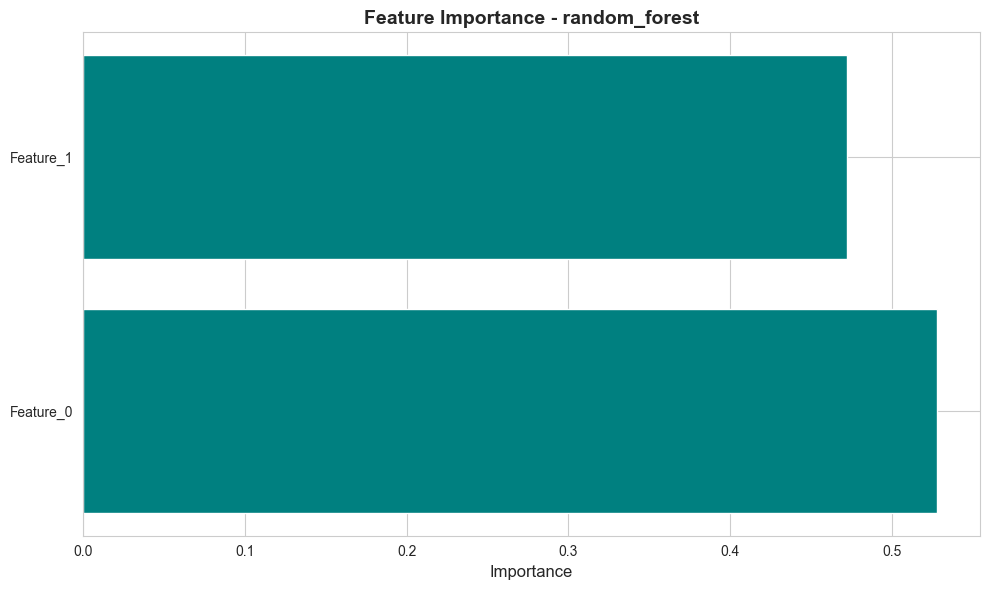


📊 Feature Importance Rankings:
  Feature  Importance
Feature_0     0.52803
Feature_1     0.47197


In [13]:
# Try to extract feature importance robustly
import numpy as np

if hasattr(best_model_obj, 'feature_importances_'):
    # Coerce importances to numeric array and handle None/NaN
    importances = np.array(getattr(best_model_obj, 'feature_importances_', []), dtype=float)
    if importances.ndim != 1 or importances.size == 0:
        print(f"ℹ️ Feature importances unavailable or empty for {best_model_name}")
    else:
        # Determine feature names; ensure length matches importances
        feature_names = results.get('selected_features', None)
        if feature_names is None or len(feature_names) != len(importances):
            # Fallback to column names or generic names matching length
            try:
                candidate = list(df.columns[:-1])
            except Exception:
                candidate = []
            if len(candidate) == len(importances):
                feature_names = candidate
            else:
                feature_names = [f'Feature_{i}' for i in range(len(importances))]

        # Replace NaN with 0.0 for plotting
        importances = np.nan_to_num(importances, nan=0.0)

        # Create DataFrame sorted by importance
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=False)

        # Use numeric positions to avoid categorical math issues
        y_pos = np.arange(len(importance_df))

        plt.figure(figsize=(10, 6))
        plt.barh(y_pos, importance_df['Importance'].values.astype(float), color='teal')
        plt.yticks(y_pos, importance_df['Feature'])
        plt.xlabel('Importance', fontsize=12)
        plt.title(f'Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

        print("\n📊 Feature Importance Rankings:")
        print(importance_df.to_string(index=False))
else:
    print(f"ℹ️ Feature importance not available for {best_model_name}")

## 8. Confusion Matrix (Best Model)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions from best model evaluation
best_eval = evaluation_results[best_model_name]
if 'y_true' in best_eval and 'y_pred' in best_eval:
    y_true = best_eval['y_true']
    y_pred = best_eval['y_pred']
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=iris.target_names, 
                yticklabels=iris.target_names)
    plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    
    # Classification report
    print("\n📋 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=iris.target_names))
else:
    print("ℹ️ Predictions not available in evaluation results.")

ℹ️ Predictions not available in evaluation results.


## 9. Try with Custom CSV Dataset

In [18]:
# Example with Breast Cancer dataset
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer['target'] = cancer.target

print(f"Cancer Dataset shape: {df_cancer.shape}")
print(f"Target distribution:")
print(df_cancer['target'].value_counts())

# Run pipeline
print("\n🚀 Running AutoML on Breast Cancer dataset...")
results_cancer = run_pipeline(
    dataset=df_cancer,
    target_column='target',
    task_type='classification',
    feature_selection_enabled=True,
    hyperparameter_tuning_enabled=False  # Skip tuning for speed
)

best_cancer = results_cancer['best_model']['name']
best_metrics = results_cancer['evaluation_results'][best_cancer]['metrics']

print(f"\n🏆 Best Model: {best_cancer}")
print(f"Accuracy: {best_metrics.get('accuracy', 0):.4f}")

# Safe handling of selected features (may be None)
selected_features_cancer = results_cancer.get('selected_features') or []
print(f"Selected Features: {len(selected_features_cancer)}")
if selected_features_cancer:
    print("Feature names:")
    for i, feature in enumerate(selected_features_cancer, 1):
        print(f"  {i}. {feature}")
else:
    print("ℹ️ Feature selection was not performed or all features were kept.")

2025-12-19 03:38:19,590 - automl.preprocessing - INFO - ======================================================================
2025-12-19 03:38:19,591 - automl.preprocessing - INFO - 🚀 AUTOML PREPROCESSING DISPATCHER
2025-12-19 03:38:19,592 - automl.preprocessing - INFO - ======================================================================
2025-12-19 03:38:19,592 - automl.preprocessing - INFO - 📌 Data type: tabular
2025-12-19 03:38:19,593 - automl.preprocessing - INFO - 📊 Routing to: tabular_preprocessing.preprocess_tabular()
2025-12-19 03:38:19,594 - automl.preprocessing - INFO - ======================================================================
2025-12-19 03:38:19,595 - automl.tabular_preprocessing - INFO - ============================================================
2025-12-19 03:38:19,596 - automl.tabular_preprocessing - INFO - Starting tabular data preprocessing...


2025-12-19 03:38:19,597 - automl.tabular_preprocessing - INFO - ============================================================
2025-12-19 03:38:19,599 - automl.tabular_preprocessing - INFO - ✓ Target column 'target' separated. Shape: (569,)
2025-12-19 03:38:19,601 - automl.tabular_preprocessing - INFO - 
📊 Column Detection:
2025-12-19 03:38:19,602 - automl.tabular_preprocessing - INFO -   • Numeric columns: 30
2025-12-19 03:38:19,603 - automl.tabular_preprocessing - INFO -   • Categorical columns: 0
2025-12-19 03:38:19,603 - automl.tabular_preprocessing - INFO - 
🔧 Handling Missing Values:
2025-12-19 03:38:19,609 - automl.tabular_preprocessing - INFO - 
🔤 Encoding Categorical Variables:
2025-12-19 03:38:19,612 - automl.tabular_preprocessing - INFO - 
✓ Total features after encoding: 30
2025-12-19 03:38:19,613 - automl.tabular_preprocessing - INFO - 
⚖️  Scaling Features:
2025-12-19 03:38:19,613 - automl.tabular_preprocessing - INFO -   • Using StandardScaler (mean=0, std=1)
2025-12-19 03

Cancer Dataset shape: (569, 31)
Target distribution:
target
1    357
0    212
Name: count, dtype: int64

🚀 Running AutoML on Breast Cancer dataset...
==== AutoML Pipeline: Start ====
Detected data type: tabular
Preprocessing data...
Running feature selection...
Initial features: 30
Selected features: 13
Applying selected indices to train/val/test splits...
Training baseline models...
Training tabular model: LogisticRegression
Training tabular model: DecisionTreeClassifier
Training tabular model: RandomForestClassifier
Training tabular model: SVC
Training tabular model: KNeighborsClassifier
Training tabular model: GradientBoostingClassifier
Evaluating models...
Evaluating model: logistic_regression
Evaluating model: decision_tree
Evaluating model: random_forest
Evaluating model: svc
Evaluating model: knn
Evaluating model: gradient_boosting
Selecting best model...
Model logistic_regression: F1-weighted=0.9737, Accuracy=0.9737, Precision=0.9740
Model decision_tree: F1-weighted=0.9476, Acc

## 10. Summary

This notebook demonstrated:
- ✅ Loading and exploring tabular datasets
- ✅ Running the complete AutoML pipeline
- ✅ Automatic feature selection
- ✅ Multiple model training and comparison
- ✅ Hyperparameter tuning
- ✅ Result visualization and interpretation

**Next Steps:**
- Try with your own CSV datasets
- Experiment with different hyperparameter search methods
- Compare performance with/without feature selection
- Explore regression tasks